# Pen Spring Diffraction Experiment
In this experiment, we illustrate the diffraction of a pen spring (a regular helix) and discuss its implications.

We will first import some standard Python libraries that we will use in our calculations and visualisation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%config InlineBackend.figure_format = 'retina'  # for Hi-DPI screens

def sinc(x):
    if (x != 0):
        return np.sin(np.pi * x) / (np. pi * x) # Prevent divide-by-zero
    else:
        return 1
sinc = np.vectorize(sinc)

### Experiment Variables
Change the variables here to match your apparatus. Units are given in **microns**.

In [2]:
slitWidth  = 2550          # 2.55mm
wavelength = 0.650         # 650nm
distance   = 10.5 * 10**6  # 10.5m

### Results
Measure the distance from the center to the *n*-th maxima (choose any reasonable number!)

Change the variable here to match your result in **mm**. It will be plotted on the visualisation later on.

In [3]:
result_mm = 25.5

# Visualising a Single-slit Diffraction
We will first set up some parameters, and then proceed to plot the intensity over distance from the center of the pattern.
### Parameters and Equation

In [4]:
amplitude = 5 # the power of the laser (mW)
x = np.arange(-50000, 50000, 10) # limits and resolution of the graph (micron)
F = sinc(slitWidth * x / wavelength / distance)
intensity = amplitude / (wavelength * distance) * (slitWidth * F)**2

### Plot the graph
See if the blue line indeed corresponds to the maxima from which you measured earlier on

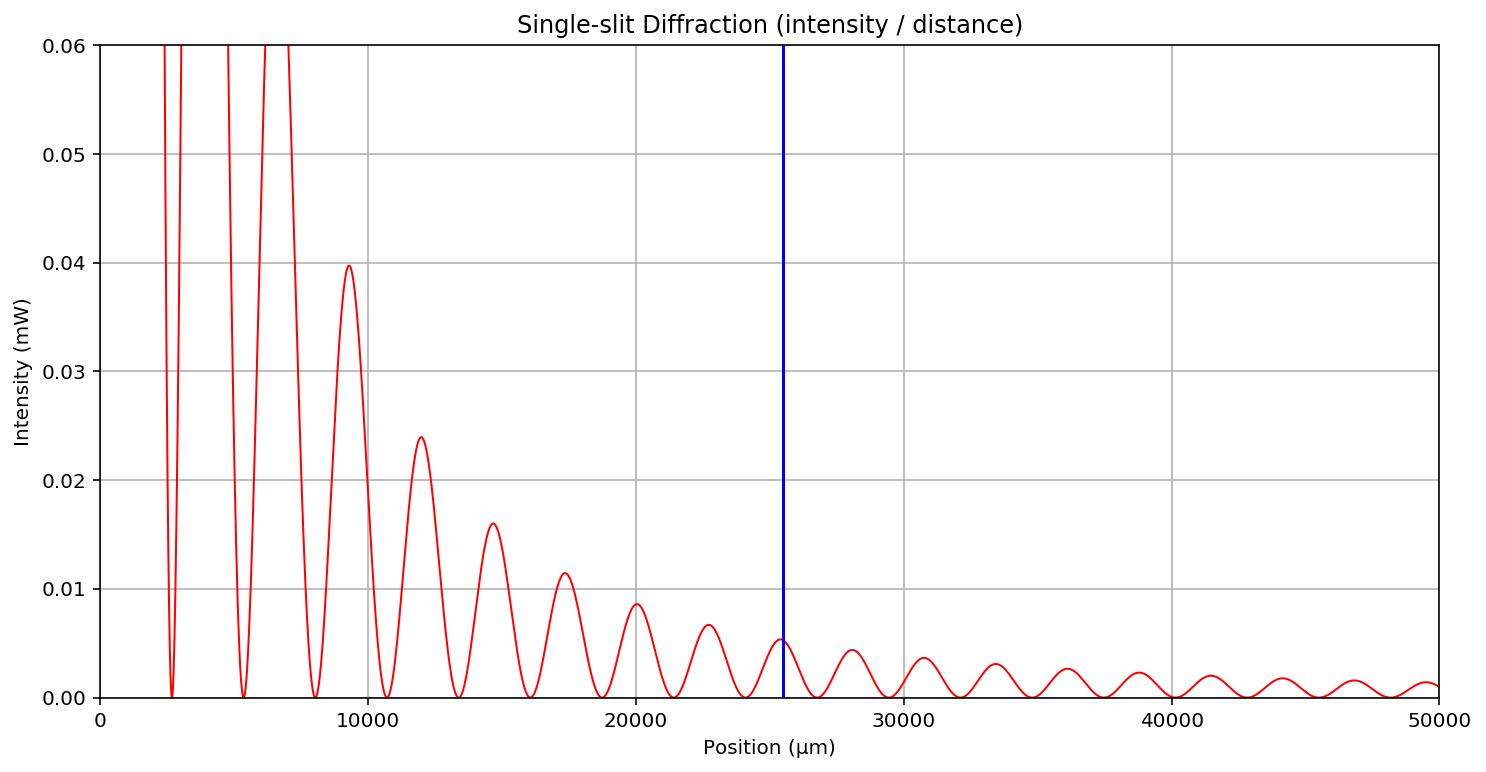

In [5]:
plt.figure(1, (12, 6))
plt.plot(x, intensity, linewidth=1, color='r') # red indicates the intensity
result = result_mm * 1000
plt.axvline(x = result, color='b') # blue indicated your result indicated earlier
plt.xlim((0, 50000))
plt.ylim((0, 0.06))
plt.xlabel(r'Position (μm)')
plt.ylabel(r'Intensity (mW)')
plt.title("Single-slit Diffraction (intensity / distance)")
plt.grid(True)
plt.show()

# Angle between the Lines
Now, we will attempt to calculate the angle between the lines that form the X-shape. It corresponds to the *helix angle* on the spring.

The laser will illuminate one pitch (complete curl) of the spring.

**Babinet’s principle** states that the diffraction pattern of an obstacle is the same as the diffraction pattern of an aperture of the same shape. Hence, we will expect to see *two* single slit diffraction patterns angled to each other.

When viewed from the side, the spring resembles looks like sine wave. We also will make use of this property later on.

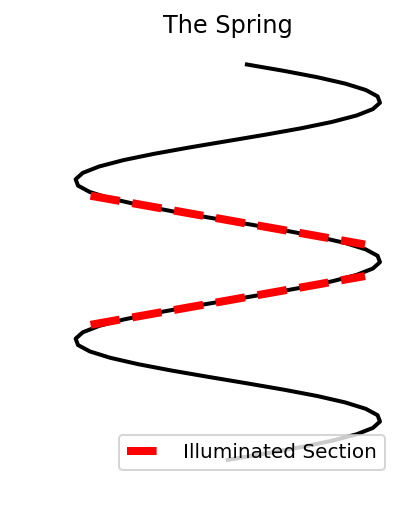

In [6]:
plt.figure(1, (3, 4))
t = np.arange(0, 2.5, 0.04)
s = np.sin(2*np.pi*t)
plt.plot(s, t, color='k', linewidth=2)
x_p = np.linspace(-0.9, 0.9, 3)
line1,  = plt.plot(x_p, 0.17*x_p + 1, '--', linewidth=4, color='r', label='Illuminated Section')
line2,  = plt.plot(x_p, -0.17*x_p + 0.98+np.pi/6, '--', linewidth=4, color='r')
plt.axis('off')
plt.legend(loc='lower right')
plt.title("The Spring")
plt.show()

### Calculating the Angle
Enter the dimensions of the spring below, measured with a pair of calipers. The units are given in **mm**.

In [7]:
pitch_mm  = 2.5   # p
radius_mm = 2.05  # R

We orientate the spring in the y-z plane to make it easier to work with. Below is the spring with the key quantities worked out.

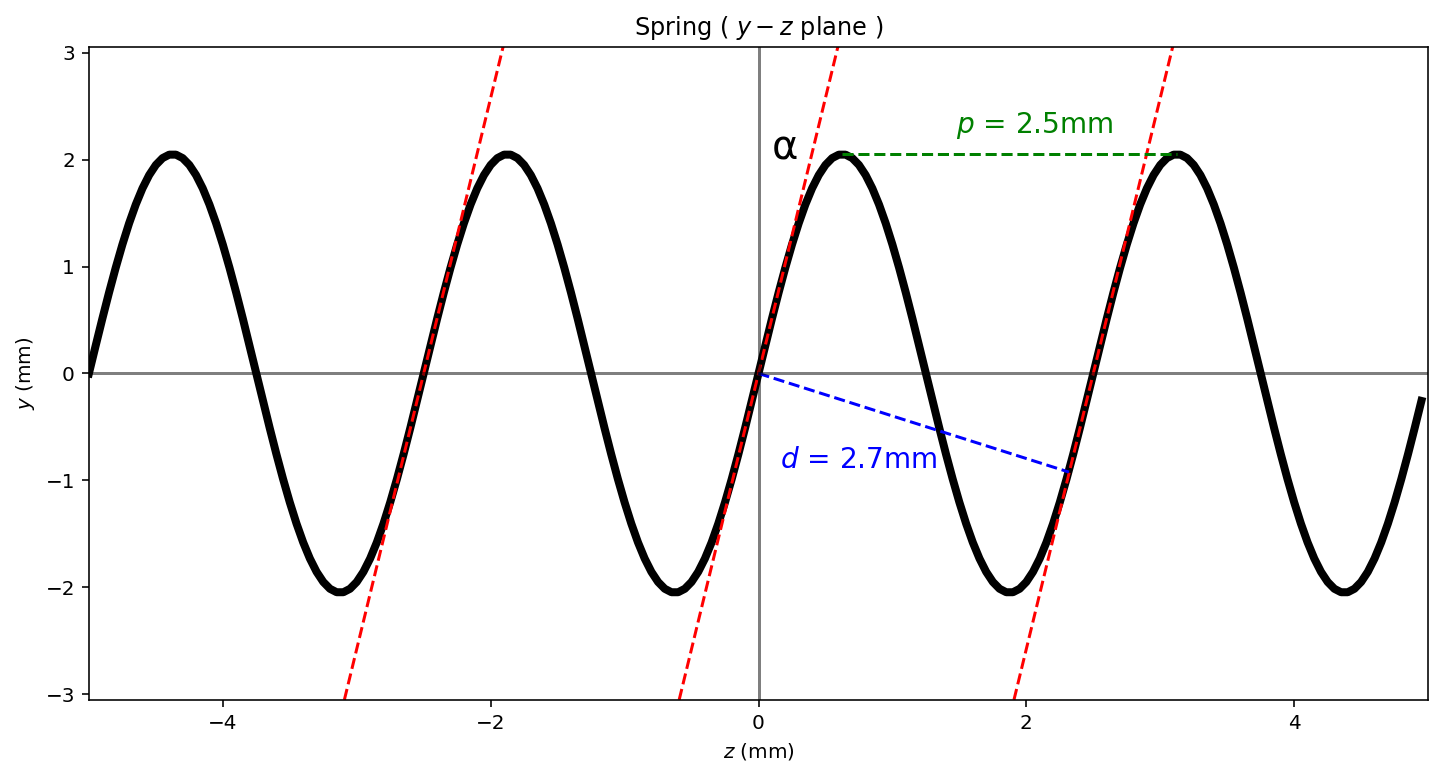

In [8]:
plt.figure(2, (12, 6))
z_q = np.arange(-2*pitch_mm, 2*pitch_mm, 0.05)
y_q = radius_mm * np.sin(2*np.pi * z_q/pitch_mm)
plt.plot(z_q, y_q, color = 'k', linewidth=4 , label='Spring')

y_1 = radius_mm * (2*np.pi * z_q/pitch_mm - 2*np.pi)
y_2 = radius_mm * (2*np.pi * z_q/pitch_mm)
y_3 = radius_mm * (2*np.pi * z_q/pitch_mm + 2*np.pi)

alpha = np.pi/2 - math.atan(radius_mm * 2*np.pi / pitch_mm)

plt.plot(z_q, y_1, "--", color='r')
plt.plot(z_q, y_2, "--", color='r')
plt.plot(z_q, y_3, "--", color='r')

plt.text(0.1, 2, "α", fontsize=20)

d = pitch_mm/math.cos(2*alpha)
x_d2 = pitch_mm*math.cos(2*alpha)

x_d = np.linspace(0, x_d2, 3)
plt.plot(x_d, -(pitch_mm/(2*np.pi)) * x_d, "--", color='b')
plt.text(x_d2/2 - 1, -radius_mm/3 - 0.2, "$d$ = " + str('%.1f'%d) + "mm", color="b", fontsize=14)

x_p1 = pitch_mm/4
x_p2 = x_p1 + pitch_mm
x_pitch = np.linspace(x_p1, x_p2, 3)
plt.plot(x_pitch, radius_mm + x_pitch*0, "--", color='g')
plt.text((x_p1+x_p2)/2-0.4, radius_mm + 0.2, "$p$ = " + str(pitch_mm) + "mm", color="g", fontsize=14)

plt.xlabel('$z$ (mm)')
plt.axvline(x=0, color='k', alpha=0.5)
plt.ylabel('$y$ (mm)')
plt.axhline(y=0, color='k', alpha=0.5)
plt.xlim((-2*pitch_mm, 2*pitch_mm))
plt.ylim((-radius_mm-1, radius_mm+1))
plt.title("Spring ( $y-z$ plane )")
plt.show()

Perform some symbolic differentiation.

In [9]:
from sympy import *
init_printing()
R, p, z = symbols('R p z')
n = symbols('n', integer=True)

eqn_y = R * sin(2 * pi * z / p)

deriv_y = diff(eqn_y, z)
deriv_y.simplify()

In [10]:
deriv_y = deriv_y.subs(z, n*p) #z = n*p
deriv_y.simplify()

We will now calculate the angle α.

In [11]:
deriv_y = deriv_y.subs(p, pitch_mm * 10**-3)
deriv_y = deriv_y.subs(R, radius_mm * 10**-3)
a = -1 * math.atan(deriv_y) + math.pi/2
print("The angle(α) between the lines is "
      + str('%.3f'%(math.degrees(a)) + " degrees (to 3sf)."))

The angle(α) between the lines is 10.984 degrees (to 3sf).


# Visualising the Actual Diffraction Pattern
Now that we have the angle and the intensity, we can attempt to visualise the pattern seen.

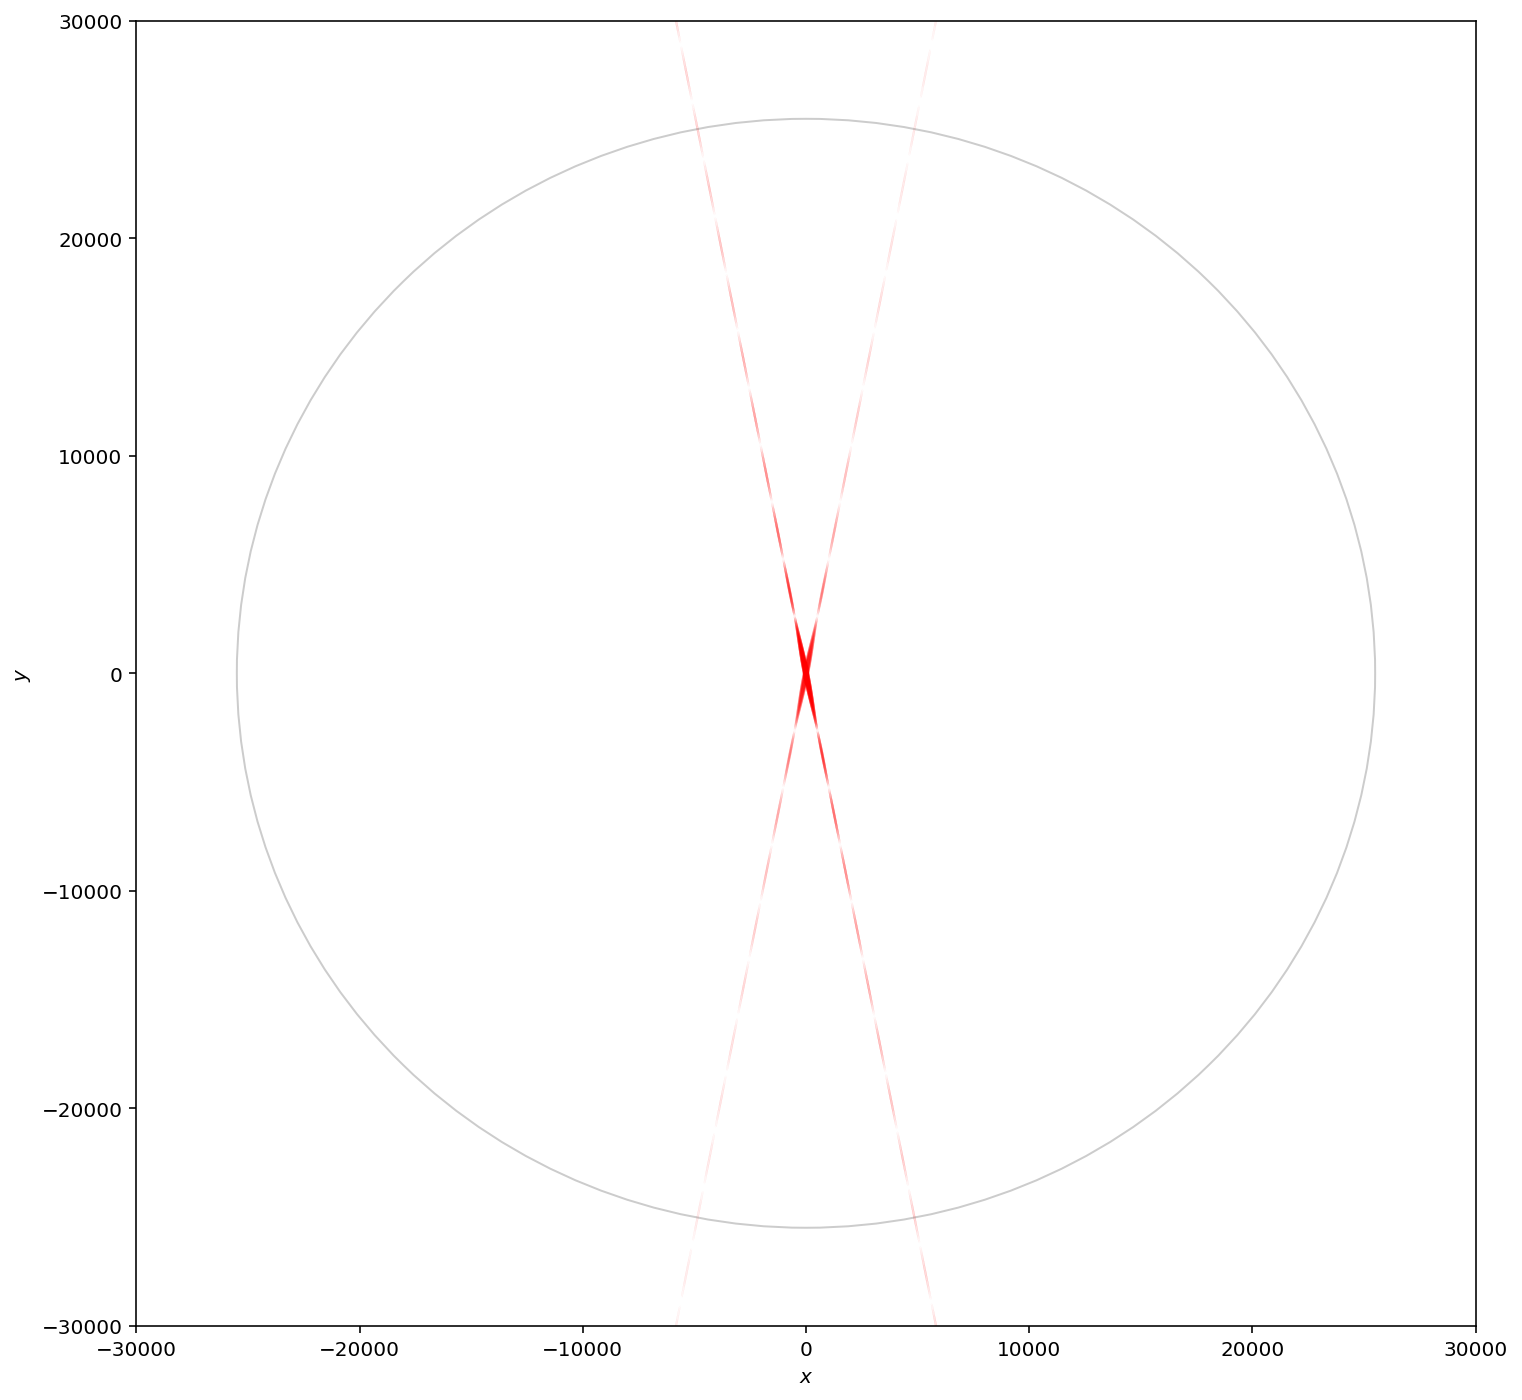

In [12]:
angle = math.pi/2 - a

plt.figure(3, (12, 12))

# transform the intensity line by rotating it about the center
x_tf = ( x / math.sqrt((math.tan(angle))**2 + 1) )
y_tf = x_tf * math.tan(angle)
plt.scatter(x_tf, y_tf, color='r', s=intensity, alpha=0.05) # plot the first line

y_tf = x_tf * math.tan(-angle)
plt.scatter(x_tf, y_tf, color='r', s=intensity, alpha=0.1) # plot the second line

# plot the circle which marks our result from earlier (gray)
ax = plt.gca()
circle_result = plt.Circle((0, 0), result, color='k', fill=False, alpha=0.2)
ax.add_artist(circle_result)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim((-30000, 30000))
plt.ylim((-30000, 30000))
plt.show()

#### Zoomed in version
This is a close-up look at the first quadrant of the above figure.

It allows us to properly judge the maxima that might not be obvious above.

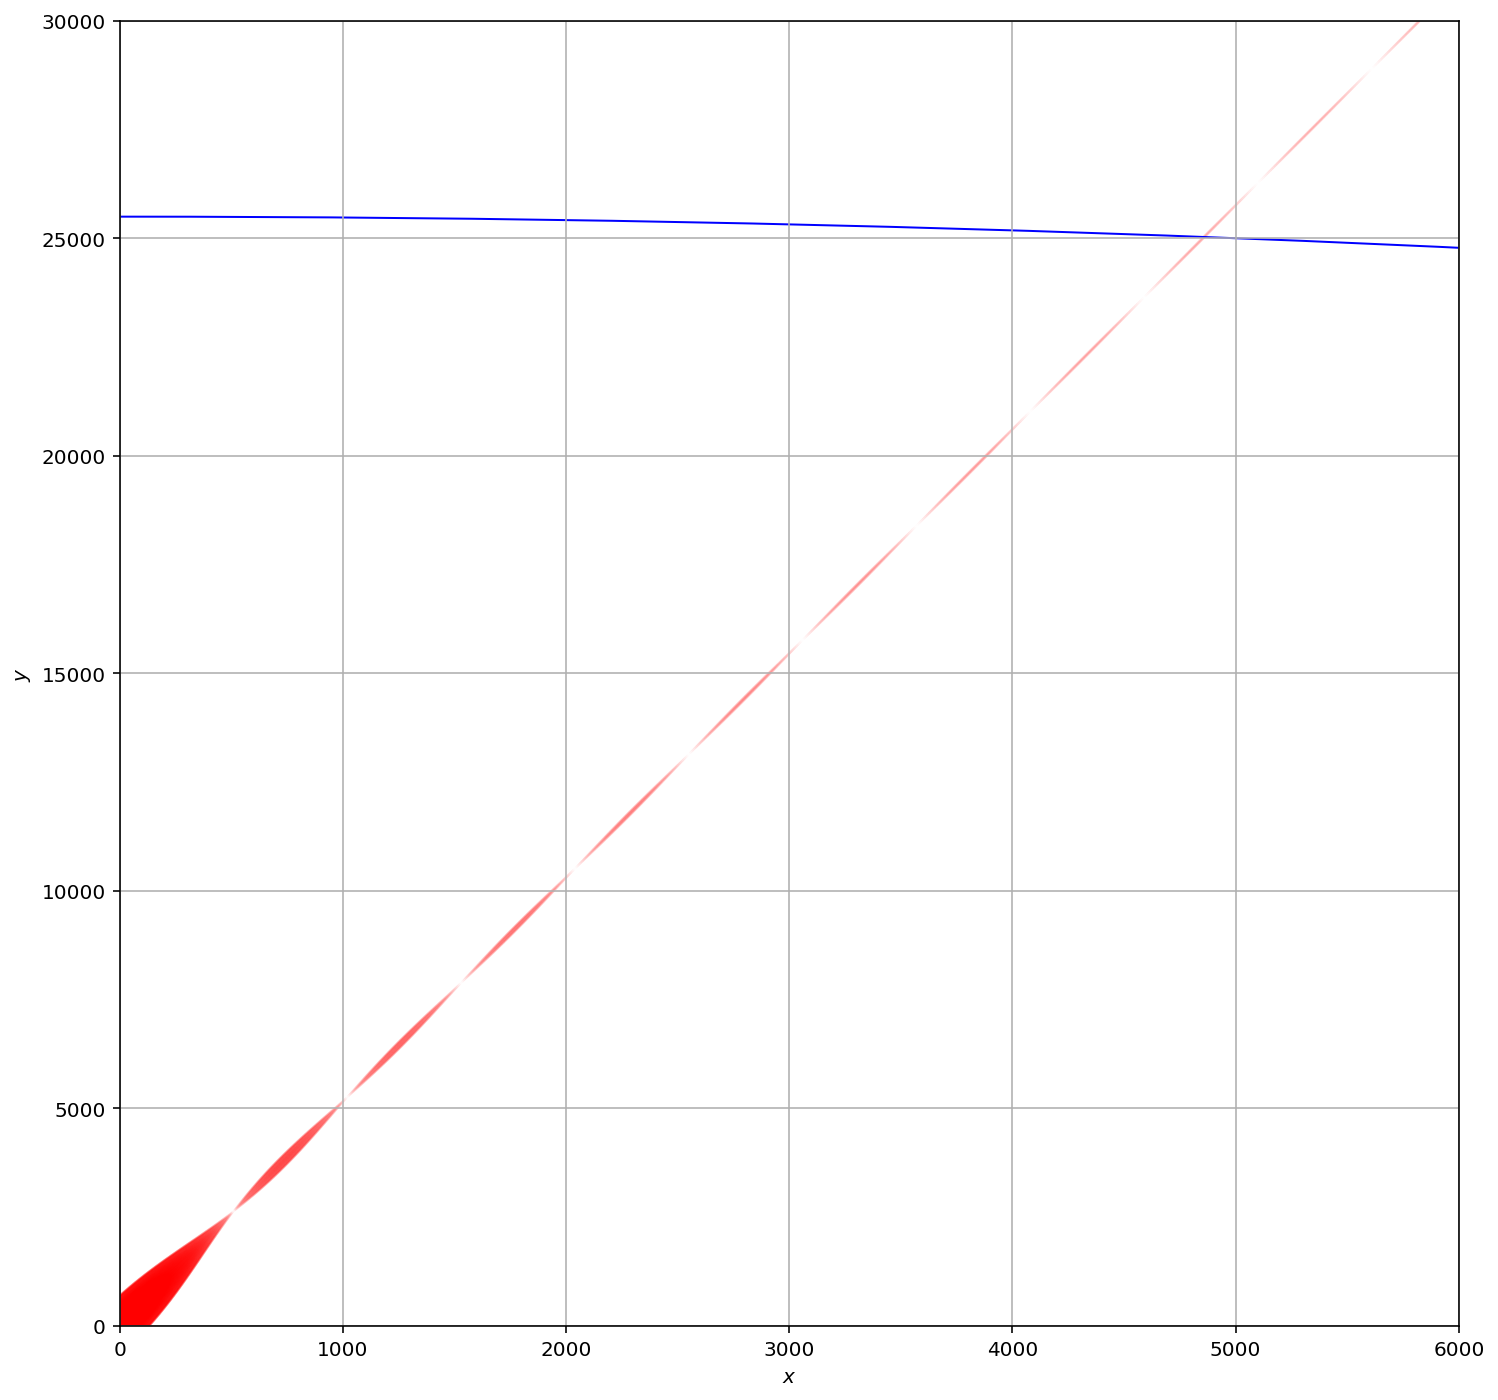

In [13]:
plt.figure(4, (12, 12))

x_tf = ( x / math.sqrt((math.tan(angle))**2 + 1) )
y_tf = x_tf * math.tan(angle)
plt.scatter(x_tf, y_tf, color='r', s=intensity*100, alpha=0.05)

# circle which marks the result (blue)
ax = plt.gca()
circle_result = plt.Circle((0, 0), result, color='b', fill=False)
ax.add_artist(circle_result)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim((0, 6000))
plt.ylim((0, 30000))
plt.grid(True)
plt.show()

# Significance of this Result
Photograph 51 (https://en.wikipedia.org/wiki/Photo_51#/media/File:Photo_51_x-ray_diffraction_image.jpg) is the nickname given to an X-ray diffraction image of DNA taken by Raymond Gosling in May 1952, working as a PhD student under the supervision of Rosalind Franklin.

Does it not resemble the result you have gotten from the pen spring?

Since objects of similar shape produce similar diffraction patterns, this result was critical evidence in identifying the structure of DNA as a regular helix.

In [14]:
import os
print(os.popen("cowsay 'Can MatLab do this?'").read())

 _____________________ 
< Can MatLab do this? >
 --------------------- 
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||

